# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [195]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import urllib
from zipfile import ZipFile


import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

#import GoogleSpreadsheets as gs

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [29]:
print ("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/yc3420/PUIdata


In [30]:
#download firearm data from github
!curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv > firearms.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0  51145      0 --:--:-- --:--:-- --:--:-- 51320


In [31]:
#download firearm data from google doc - extra credit
''''''''''''
''''''''''''

''

In [32]:
#download the number of mass shootings:
url1 = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%\
20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustra\
lia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0A\
Denmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%\
0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%\
0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0A\
New%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%\
0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2\
%2C3%0AUnited%20States%2C88.8%2C78'
urllib.urlretrieve(url1,'mass_shoting.csv')

('mass_shoting.csv', <mimetools.Message instance at 0x7f12a0f5f170>)

In [33]:
#download the world pop:
!curl http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv > pop.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79717  100 79717    0     0   261k      0 --:--:-- --:--:-- --:--:--  262k


In [34]:
#download the world GDP
!curl 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'> gdp.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  113k  100  113k    0     0   579k      0 --:--:-- --:--:-- --:--:--  578k


In [35]:
#move them to PUIdata
!mv firearms.csv mass_shoting.csv pop.zip gdp.zip  $PUIDATA

In [37]:
!unzip -o $PUIDATA/pop.zip -d $PUIDATA

Archive:  /nfshome/yc3420/PUIdata/pop.zip
  inflating: /nfshome/yc3420/PUIdata/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/yc3420/PUIdata/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/yc3420/PUIdata/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  


In [38]:
!unzip -o $PUIDATA/gdp.zip -d $PUIDATA

Archive:  /nfshome/yc3420/PUIdata/gdp.zip
  inflating: /nfshome/yc3420/PUIdata/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: /nfshome/yc3420/PUIdata/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: /nfshome/yc3420/PUIdata/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  


In [39]:
!ls $PUIDATA

1p
API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
boro
citibike
firearms.csv
gdp.zip
mass_shoting.csv
Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
PLUTO_for_WEB
pop.zip
PUMA
ZIP


In [81]:
#read in data
firearms = pd.read_csv(os.getenv("PUIDATA") + '/firearms.csv')
massshot = pd.read_csv(os.getenv("PUIDATA") + '/mass_shoting.csv')
pop = pd.read_csv(os.getenv("PUIDATA") + '/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv',skiprows=1, header=1)
gdp = pd.read_csv(os.getenv("PUIDATA") + '/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv',skiprows=1, header=1)

In [82]:
firearms.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [83]:
massshot.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [84]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [85]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [86]:
column_f = ['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm'] 
pop = pop[['Country Name', '2012']].dropna()
gdp = gdp[['Country Name', '2012']].dropna()
fa = pd.DataFrame(firearms, columns = column_f)

In [98]:
df1 = pop.merge(gdp, on = 'Country Name')

In [99]:
df2 = df1.merge(fa, left_on = 'Country Name', right_on = 'Country/Territory')

In [100]:
df_ = df2.merge(massshot, left_on = 'Country Name', right_on = 'Country')

In [101]:
df_.head()

,Country Name,2012_x,2012_y,Country/Territory,Average total all civilian firearms,Number of homicides by firearm,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,22742475.0,1.543411e+12,Australia,3050000.0,30.0,Australia,15.0,4
1,Austria,8429991.0,4.094252e+11,Austria,2500000.0,18.0,Austria,30.4,1
2,Belgium,11128246.0,4.978842e+11,Belgium,1800000.0,70.0,Belgium,17.2,2
3,Canada,34750545.0,1.824289e+12,Canada,9950000.0,173.0,Canada,30.8,4
4,Switzerland,7996861.0,6.680436e+11,Switzerland,3400000.0,57.0,Switzerland,45.7,2


In [102]:
df_.rename(columns = {'2012_x' : 'pop', '2012_y':'gdp', 'Number of mass shootings (1983-2013)' : 'Number of mass shootings'}, inplace = True)
df_.drop(['Country','Country/Territory'], axis = 1,inplace = True)

In [103]:
df_.head()

,Country Name,pop,gdp,Average total all civilian firearms,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings
0,Australia,22742475.0,1.543411e+12,3050000.0,30.0,15.0,4
1,Austria,8429991.0,4.094252e+11,2500000.0,18.0,30.4,1
2,Belgium,11128246.0,4.978842e+11,1800000.0,70.0,17.2,2
3,Canada,34750545.0,1.824289e+12,9950000.0,173.0,30.8,4
4,Switzerland,7996861.0,6.680436e+11,3400000.0,57.0,45.7,2


# exploration

## 1. plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


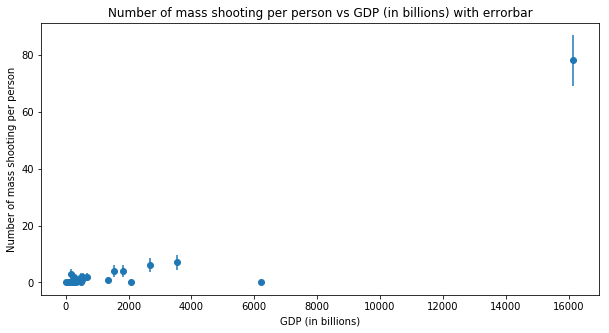

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [106]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.set_title('Number of mass shooting per person vs GDP (in billions) with errorbar')
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


Figure 1. This is a scatter plot of number of mass shooting per person vs GDP (in billions) with errorbar. Most of the points are concentrated near the lower left corner of the plot. However, there is one point placed at the upper right corner which could be identified as an outlier. 

## 2. plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [110]:
df_.head()

,Country Name,pop,gdp,Average total all civilian firearms,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings,shootingspp
0,Australia,22742475.0,1.543411e+12,3050000.0,30.0,15.0,4,0.000176
1,Austria,8429991.0,4.094252e+11,2500000.0,18.0,30.4,1,0.000119
2,Belgium,11128246.0,4.978842e+11,1800000.0,70.0,17.2,2,0.000180
3,Canada,34750545.0,1.824289e+12,9950000.0,173.0,30.8,4,0.000115
4,Switzerland,7996861.0,6.680436e+11,3400000.0,57.0,45.7,2,0.000250


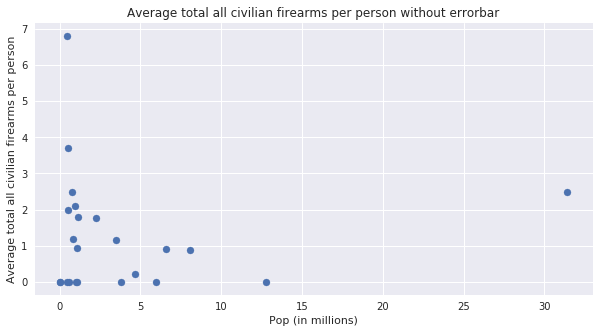

In [198]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e7
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['pop']/1e7, df_['shootingspp'])
ax.set_xlabel("Pop (in millions)")
ax.set_ylabel("Average total all civilian firearms per person")
ax.set_ylim()
ax.set_title('Average total all civilian firearms per person without errorbar')
pl.show()


Figure 2-1. This is a scatter plot of Average total all civilian firearms per person vs population without errorbar.

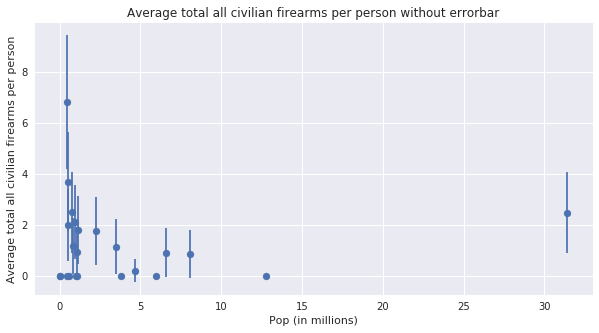

In [199]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['pop']/1e7, df_['shootingspp'])
ax.errorbar(df_['pop'] / 1e7, df_['shootingspp'], yerr = np.sqrt(df_['shootingspp']), fmt = '.')
ax.set_xlabel("Pop (in millions)")
ax.set_ylabel("Average total all civilian firearms per person")
ax.set_ylim()
ax.set_title('Average total all civilian firearms per person without errorbar')
pl.show()



Figure 2-2. This is a scatter plot of Average total all civilian firearms per person vs population with errorbar.

## 3. plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [138]:
df_.head()

,Country Name,pop,gdp,Average total all civilian firearms,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings,shootingspp
0,Australia,22742475.0,1.543411e+12,3050000.0,30.0,15.0,4,0.134110
1,Austria,8429991.0,4.094252e+11,2500000.0,18.0,30.4,1,0.296560
2,Belgium,11128246.0,4.978842e+11,1800000.0,70.0,17.2,2,0.161751
3,Canada,34750545.0,1.824289e+12,9950000.0,173.0,30.8,4,0.286326
4,Switzerland,7996861.0,6.680436e+11,3400000.0,57.0,45.7,2,0.425167


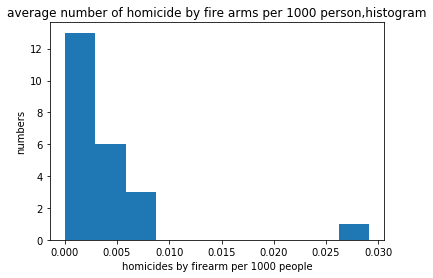

In [148]:
fig, ax = pl.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')
ax.set_title('average number of homicide by fire arms per 1000 person,histogram')
ax.set_ylabel('numbers')
pl.show()

Figure 3-1. This is a histogram that shows average number of homicide by fire arms per 1000 person,histogram

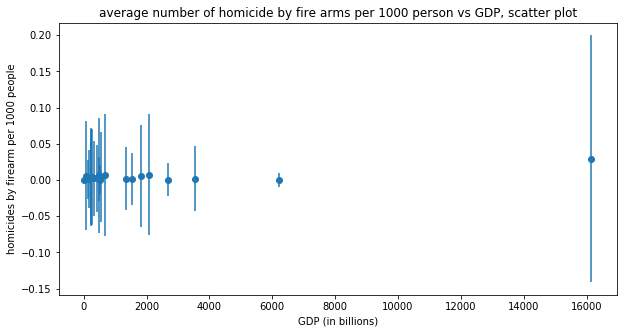

In [151]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp']/1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.errorbar(df_['gdp']/1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000, yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("homicides by firearm per 1000 people")
ax.set_ylim()
ax.set_title('average number of homicide by fire arms per 1000 person vs GDP, scatter plot')
pl.show()



Figure 3-2. This is a scatter plot (with stat error) of average number of homicide by fire arms per 1000 person vs GDP (in billions). 

## 4. plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [152]:
df_.head()

,Country Name,pop,gdp,Average total all civilian firearms,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings,shootingspp
0,Australia,22742475.0,1.543411e+12,3050000.0,30.0,15.0,4,0.134110
1,Austria,8429991.0,4.094252e+11,2500000.0,18.0,30.4,1,0.296560
2,Belgium,11128246.0,4.978842e+11,1800000.0,70.0,17.2,2,0.161751
3,Canada,34750545.0,1.824289e+12,9950000.0,173.0,30.8,4,0.286326
4,Switzerland,7996861.0,6.680436e+11,3400000.0,57.0,45.7,2,0.425167


In [162]:
us = df_[df_['Country Name'].isin(['United States'])]

In [163]:
us.head()

,Country Name,pop,gdp,Average total all civilian firearms,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings,shootingspp
22,United States,313993272.0,1.615526e+13,270000000.0,9146.0,88.8,78,0.859891


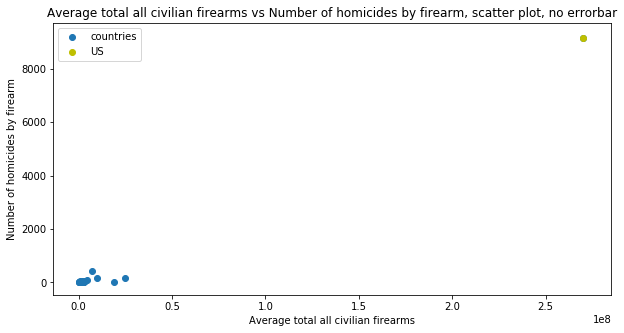

In [193]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['Average total all civilian firearms'],df_['Number of homicides by firearm'], label = 'countries')
ax.scatter(us['Average total all civilian firearms'], us['Number of homicides by firearm'], color = 'y', label = 'US')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
ax.legend()
ax.set_title('Average total all civilian firearms vs Number of homicides by firearm, scatter plot, no errorbar')

pl.show()



Figure 4-1. number of homicides by fire arm against the number of civilian firearms, US in green. 

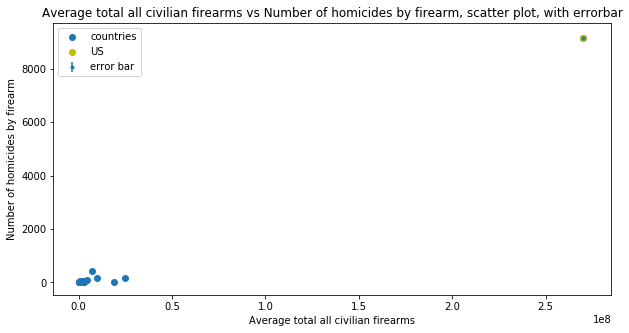

In [192]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['Average total all civilian firearms'],df_['Number of homicides by firearm'], label = 'countries')
ax.scatter(us['Average total all civilian firearms'], us['Number of homicides by firearm'], color = 'y', label = 'US')
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'],\
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', label = 'error bar')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
ax.legend()
ax.set_title('Average total all civilian firearms vs Number of homicides by firearm, scatter plot, with errorbar')
pl.show()




Figure 4-2. number of homicides by fire arm against the number of civilian firearms, US in green, with errorbar. 

## 5. plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [178]:
df_.head()

,Country Name,pop,gdp,Average total all civilian firearms,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings,shootingspp
0,Australia,22742475.0,1.543411e+12,3050000.0,30.0,15.0,4,0.134110
1,Austria,8429991.0,4.094252e+11,2500000.0,18.0,30.4,1,0.296560
2,Belgium,11128246.0,4.978842e+11,1800000.0,70.0,17.2,2,0.161751
3,Canada,34750545.0,1.824289e+12,9950000.0,173.0,30.8,4,0.286326
4,Switzerland,7996861.0,6.680436e+11,3400000.0,57.0,45.7,2,0.425167


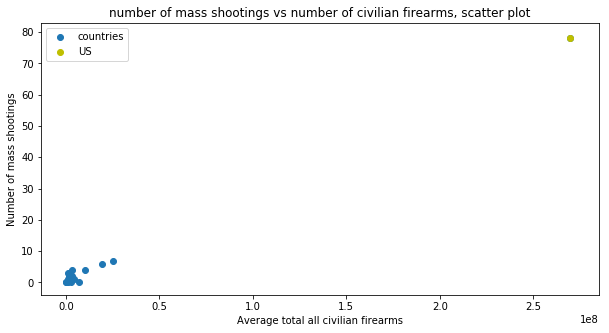

In [191]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['Average total all civilian firearms'],df_['Number of mass shootings'],label = 'countries')
ax.scatter(us['Average total all civilian firearms'], us['Number of mass shootings'], color = 'y',label = 'US')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
ax.legend()
ax.set_title('number of mass shootings vs number of civilian firearms, scatter plot')
pl.show()



Figure 5-1. number of mass shootings vs number of civilian firearms, scatter plot

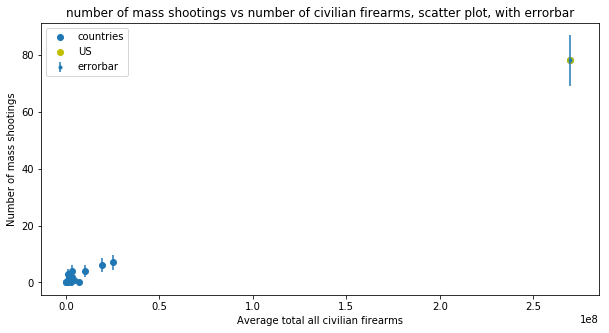

In [190]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['Average total all civilian firearms'],df_['Number of mass shootings'], label = 'countries')
ax.scatter(us['Average total all civilian firearms'], us['Number of mass shootings'], color = 'y', label = 'US')
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of mass shootings'],\
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', label = 'errorbar')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.legend()
ax.set_ylim()
ax.set_title('number of mass shootings vs number of civilian firearms, scatter plot, with errorbar')
pl.show()





Figure 5-2. number of mass shootings vs number of civilian firearms, scatter plot, with error bar

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [196]:
df_['firearmspp'] = df_['Average total all civilian firearms'] / df_['pop']
df_.head()

,Country Name,pop,gdp,Average total all civilian firearms,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings,shootingspp,firearmspp
0,Australia,22742475.0,1.543411e+12,3050000.0,30.0,15.0,4,0.134110,0.134110
1,Austria,8429991.0,4.094252e+11,2500000.0,18.0,30.4,1,0.296560,0.296560
2,Belgium,11128246.0,4.978842e+11,1800000.0,70.0,17.2,2,0.161751,0.161751
3,Canada,34750545.0,1.824289e+12,9950000.0,173.0,30.8,4,0.286326,0.286326
4,Switzerland,7996861.0,6.680436e+11,3400000.0,57.0,45.7,2,0.425167,0.425167


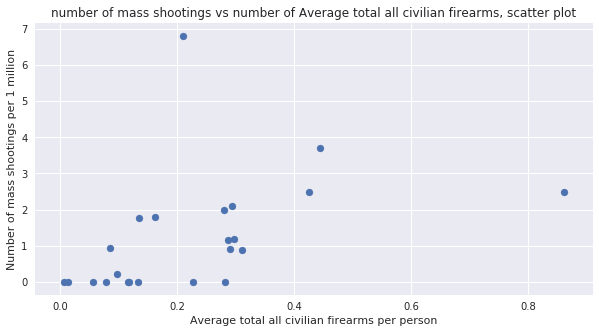

In [201]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearmspp'],df_['shootingspp'])
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per 1 million")
ax.set_ylim()
ax.set_title('number of mass shootings vs number of Average total all civilian firearms, scatter plot')
pl.show()



Figure 6. number of mass shootings vs number of Average total all civilian firearms, scatter plot

#  OLS

In [211]:

x = df_['firearmspp']
x_c = sm.add_constant(x)
y = df_['shootingspp']
lrd_o = smf.ols(formula = 'y~x_c', data = df_).fit()
lrd_o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0367
Time:                        22:12:57   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1842      0.248      0.742      0.467        -0.332     0.701
x_c[0]         0.1842      0.248      0.742      0.467        -0.332     0.701
x_c[1]         3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                     2.84e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.87e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

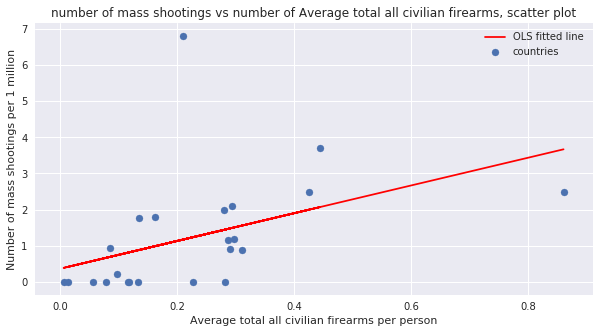

In [220]:
# ols plot, with fitting line
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pred = lrd_o.predict(x_c)

ax.scatter(df_['firearmspp'],df_['shootingspp'],label = 'countries')
ax.plot(df_['firearmspp'], pred, label = 'OLS fitted line', color = 'r')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per 1 million")
ax.set_ylim()
ax.legend()
ax.set_title('number of mass shootings vs number of Average total all civilian firearms, scatter plot')
pl.show()



Figure 7. number of mass shootings vs number of Average total all civilian firearms, scatter plot. With OLS fitted line.

# WLS

In [218]:
lrd_w = smf.wls(formula = 'y~x_c', data = df_, weights= list(1.0 / np.sqrt(x))).fit()
lrd_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            WLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     8.220
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00923
Time:                        22:21:25   Log-Likelihood:                -38.631
No. Observations:                  23   AIC:                             81.26
Df Residuals:                      21   BIC:                             83.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0382      0.177      0.216      0.831        -0.330     0.406
x_c[0]         0.0382      0.177      0.216      0.831        -0.330     0.406
x_c[1]         4.9500      1.727      2.867      0.009         1.359     8.541
==============================================================================
Omnibus:                       35.826   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.403
Skew:                           2.738   Prob(JB):                     4.29e-22
Kurtosis:                      11.526   Cond. No.                     3.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

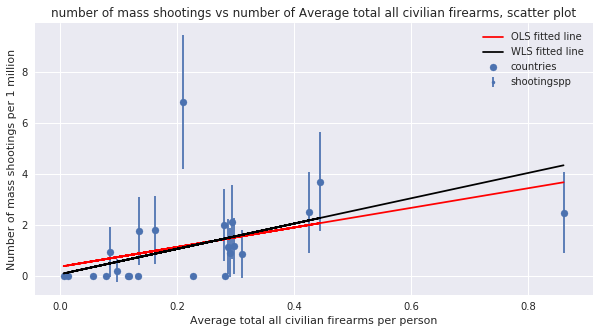

In [221]:
# ols & wls plot, with fitting line
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pred_w = lrd_w.predict(x_c)

ax.scatter(df_['firearmspp'],df_['shootingspp'],label = 'countries')
ax.plot(df_['firearmspp'], pred, label = 'OLS fitted line', color = 'r')
ax.plot(df_['firearmspp'], pred_w, label = 'WLS fitted line', color = 'k')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per 1 million")
ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp']), fmt = '.')
ax.set_ylim()
ax.legend()
ax.set_title('number of mass shootings vs number of Average total all civilian firearms, scatter plot')
pl.show()



Figure 8. number of mass shootings vs number of Average total all civilian firearms, scatter plot. With OLS and WLS fitted line.

# Seaborn / sns

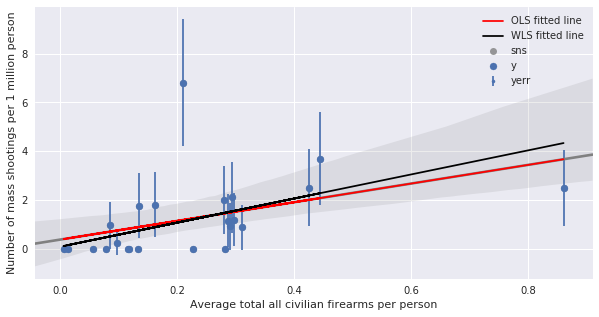

In [223]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

sns.regplot(y='shootingspp', x='firearmspp', data=df_, color="grey", label="sns")
ax.scatter(df_['firearmspp'], df_['shootingspp'], label="y")
ax.plot(df_['firearmspp'], pred, label = 'OLS fitted line', color = 'r')
ax.plot(df_['firearmspp'], pred_w, label = 'WLS fitted line', color = 'k')
ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp']), fmt = '.', label='yerr')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.legend()
ax.set_ylim()
pl.show()

Figure 9. number of mass shootings vs number of Average total all civilian firearms, scatter plot. With OLS, WLS and seaborn fitted line. Also attached the stat error.

- choose one of  
    -- creating a function that calculates the residuals and minimizing that function  
    -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html  
    -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html  


# np.polyfit()

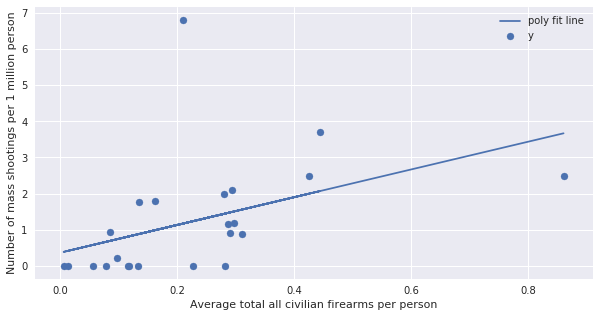

In [227]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearmspp'], df_['shootingspp'], label="y")
k, b = np.polyfit(df_['firearmspp'], df_['shootingspp'], 1)
y = k*x + b
pl.plot(x, y, label="poly fit line")

# ax.plot(df_['firearmspp'], pred, label = 'OLS fitted line', color = 'r')
# ax.plot(df_['firearmspp'], pred_w, label = 'WLS fitted line', color = 'k')
# ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp']), fmt = '.', label='yerr')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.legend()
ax.set_ylim()
pl.show()

Figure 10. number of mass shootings vs number of Average total all civilian firearms, scatter plot. with numpy.polyfit() line.

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [228]:
df_.describe()

,pop,gdp,Average total all civilian firearms,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings,shootingspp,firearmspp
count,2.300000e+01,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000
mean,3.843543e+07,1.745179e+12,1.565543e+07,453.434783,23.786957,4.956522,1.235689,0.226016
std,6.788910e+07,3.457710e+12,5.578880e+07,1897.064355,19.089581,16.046745,1.613199,0.184069
min,3.207160e+05,1.429201e+10,7.000000e+04,0.000000,0.600000,0.000000,0.000000,0.005563
25%,5.502772e+06,2.356213e+11,6.800000e+05,13.000000,11.150000,0.000000,0.000000,0.106228
50%,1.051484e+07,5.003608e+11,2.400000e+06,30.000000,22.500000,1.000000,0.913801,0.209841
75%,4.241811e+07,1.683850e+12,3.950000e+06,63.500000,31.000000,2.500000,1.894913,0.291754
max,3.139933e+08,1.615526e+13,2.700000e+08,9146.000000,88.800000,78.000000,6.805653,0.859891


In [232]:
ind = ((df_['shootingspp'] < 3) & (df_['firearmspp']  < 0.3))
df_n = df_[ind]

In [233]:
x_n = df_n['firearmspp']
x_nc = sm.add_constant(x_n)
y_n = df_n['shootingspp']
lrd_on = smf.ols(formula = 'y_n~x_nc', data = df_n).fit()
lrd_on.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_n   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     6.765
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0193
Time:                        22:53:01   Log-Likelihood:                -18.047
No. Observations:                  18   AIC:                             40.09
Df Residuals:                      16   BIC:                             41.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0164      0.158     -0.104      0.919        -0.352     0.319
x_nc[0]       -0.0164      0.158     -0.104      0.919        -0.352     0.319
x_nc[1]        4.2916      1.650      2.601      0.019         0.794     7.789
==============================================================================
Omnibus:                        0.723   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.740
Skew:                           0.362   Prob(JB):                        0.691
Kurtosis:                       2.321   Cond. No.                     1.06e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.26e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [234]:
lrd_wn = smf.wls(formula = 'y_n~x_nc', data = df_n, weights= list(1.0 / np.sqrt(x_n))).fit()
lrd_wn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    y_n   R-squared:                       0.395
Model:                            WLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     10.44
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00523
Time:                        22:53:50   Log-Likelihood:                -16.093
No. Observations:                  18   AIC:                             36.19
Df Residuals:                      16   BIC:                             37.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0223      0.099     -0.225      0.825        -0.232     0.187
x_nc[0]       -0.0223      0.099     -0.225      0.825        -0.232     0.187
x_nc[1]        4.3582      1.349      3.230      0.005         1.498     7.218
==============================================================================
Omnibus:                        1.327   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                1.156
Skew:                           0.514   Prob(JB):                        0.561
Kurtosis:                       2.304   Cond. No.                     1.44e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.19e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# we can notice that, there are some improvement on R2 and other coefficients which indicate a better fitted line.

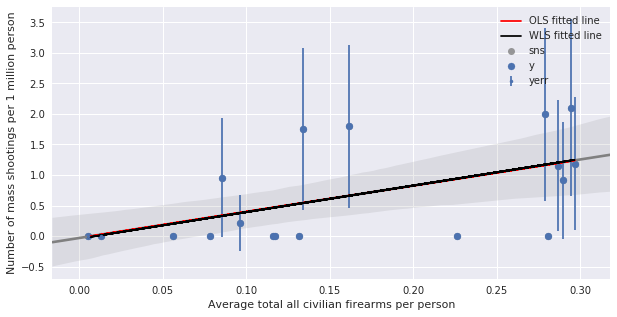

In [235]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)


pred = lrd_on.predict(x_nc)
pred_w = lrd_wn.predict(x_nc)
sns.regplot(y='shootingspp', x='firearmspp', data=df_n, color="grey", label="sns")
ax.scatter(df_n['firearmspp'], df_n['shootingspp'], label="y")
ax.plot(df_n['firearmspp'], pred, label = 'OLS fitted line', color = 'r')
ax.plot(df_n['firearmspp'], pred_w, label = 'WLS fitted line', color = 'k')
ax.errorbar(df_n['firearmspp'], df_n['shootingspp'], yerr = np.sqrt(df_n['shootingspp']), fmt = '.', label='yerr')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.legend()
ax.set_ylim()
pl.show()

Figure 11. number of mass shootings vs number of Average total all civilian firearms, scatter plot. With OLS, WLS and seaborn fitted line. Also attached the stat error. Outlier removed

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [245]:
pl.figure()
import seaborn  as sns
sns.regplot(x = x_n, y= y_n, data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

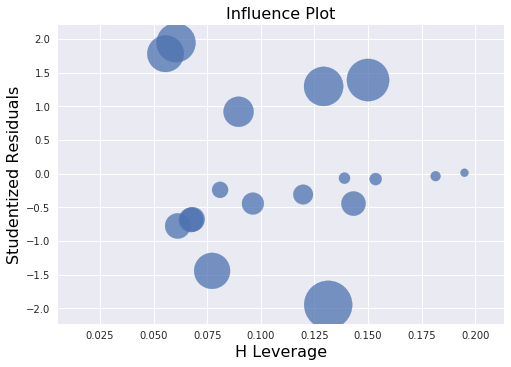

In [243]:
fig = pl.figure(figsize=(10,5)) 


smols = sm.OLS(y_n, x_nc).fit()
sm.graphics.influence_plot(smols, alpha=0.05, criterion="cooks")
pl.show()

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings